### (a) Download Data

<center><h1>Patel_Datt_HW2</h1></center>
<br>
<br>

## 1. Combined Cycle Power Plant Data Set

Package imports

In [314]:
'''
Name: Datt Patel
USC ID: 2149812400
USC Email: dattpate@usc.edu
Github ID: dattpatel99
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
import re
from scipy import stats

Get the Cycle Power Plant Data Set

In [315]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### (b) Exploring the data

#### i. rows and columns

In [316]:
print('There are {} rows and {} columns in the data.'.format(df.shape[0], df.shape[1]))

There are 9568 rows and 5 columns in the data.


The data inlcudes the hourly average values collected to various sensors for the features: Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH), Exhaust Vacuum (V), Net hourly electrical energy output (PE). Each Row indicates the average hourly values collected in the plant.

#### ii. pairwise scatterplots of all the varianbles

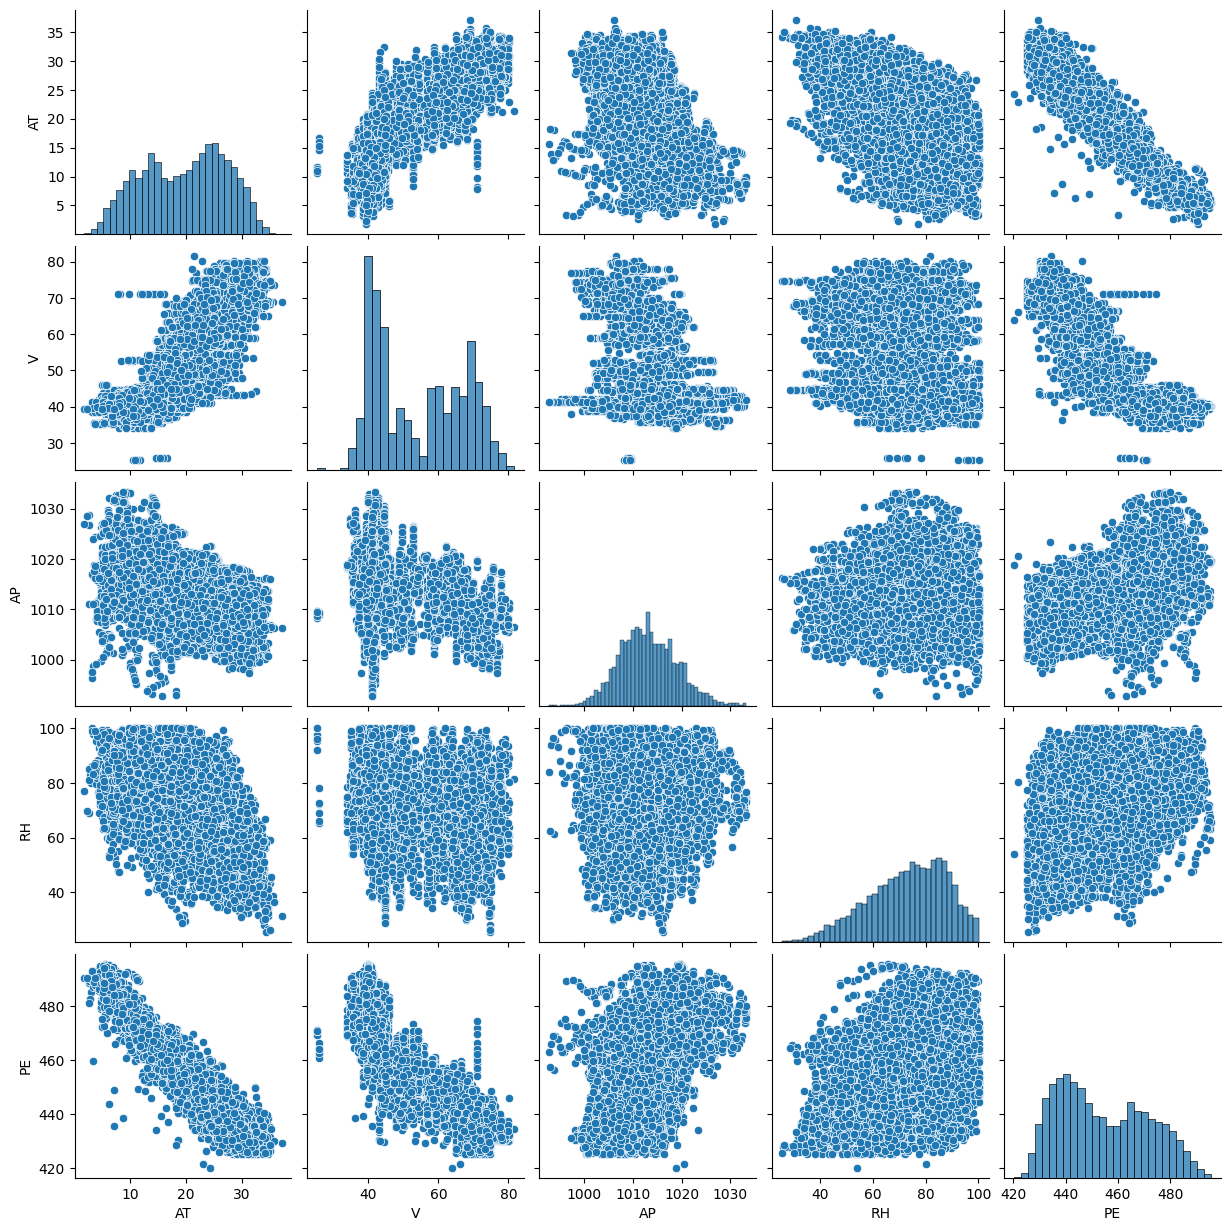

In [317]:
sns.pairplot(df)

Based on the pairwise plot we can see that AT and V correlation with PE.

#### Findings Description

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [318]:
data_info = df.describe().T # Get Data Description
data_info['range'] = data_info['max'] - data_info['min'] # Calcualte Range
data_info['interquartile'] = data_info['75%'] - data_info['25%'] # Calculate Interquartile Range
data_info['median'] = df.median() # add median column
data_info[['mean', 'median', 'range', '25%', '75%', 'interquartile']]

,mean,median,range,25%,75%,interquartile
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### (c) Simple Linear Regression

A general function to run statistical analysis using OLS

In [319]:
# https://www.statsmodels.org/devel/example_formulas.html
# https://www.science.smith.edu/~jcrouser/SDS293/labs/lab2-py.html

# Run OLS using a formula
def runOLSFormula(formula, data):
    model = sm.OLS.from_formula(formula=formula, data=data)
    result = model.fit()
    return result

In [320]:
X_at = df[['AT']]   
X_v  = df[['V']]  
X_ap = df[['AP']]  
X_rh = df[['RH']] 
y = df[['PE']]

In [321]:
x_values = [X_at, X_v, X_ap, X_rh]
formulas_c = ['PE ~ AT','PE ~ V','PE ~ AP','PE ~ RH']
results = []
predictions = []
outliers = []
for i in range(len(formulas_c)):
    result = runOLSFormula(formulas_c[i], df)
    results.append(result)
    outliers.append(result.outlier_test())
    predictions.append(result.predict(x_values[i]))

In [322]:
def outputAnalysis(results, outliers, y, predictions, x_values, idx, predictor):
    print(results[idx].summary2())
    outlier_indx = np.where(outliers[idx].iloc[:, 0]>3)
    fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,20))
    fig.suptitle('Predictor {} Analysis'.format(predictor), fontsize= 20)
    ax1.scatter(x_values[idx], y)    
    ax1.scatter(x_values[idx].iloc[outlier_indx], y.iloc[outlier_indx], color ='orange', label='Outliers')
    ax1.plot(x_values[idx], predictions[idx], color='red', linestyle='dotted', label='Regression Fit')
    ax1.legend(loc='best')
    ax2.scatter(x_values[idx], outliers[idx].iloc[:,0])
    ax2.scatter(x_values[idx].iloc[outlier_indx], outliers[idx].loc[outlier_indx, 'student_resid'], color ='orange', label='Outliers')
    ax2.axhline(y=3, color='green', linestyle='--', label='Outlier Threshold')
    ax2.legend(loc='best')

## (i) AT VS PE

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.899     
Dependent Variable: PE               AIC:                59516.4764
Date:               2023-02-09 13:24 BIC:                59530.8088
No. Observations:   9568             Log-Likelihood:     -29756.   
Df Model:           1                F-statistic:        8.510e+04 
Df Residuals:       9566             Prob (F-statistic): 0.00      
R-squared:          0.899            Scale:              29.438    
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept  497.0341    0.1564  3177.2804  0.0000  496.7275  497.3408
AT          -2.1713    0.0074  -291.7152  0.0000   -2.1859   -2.1567
-------------------------------------------------------------------
Omnibus:             417.457       Durbin-Watson:          2.

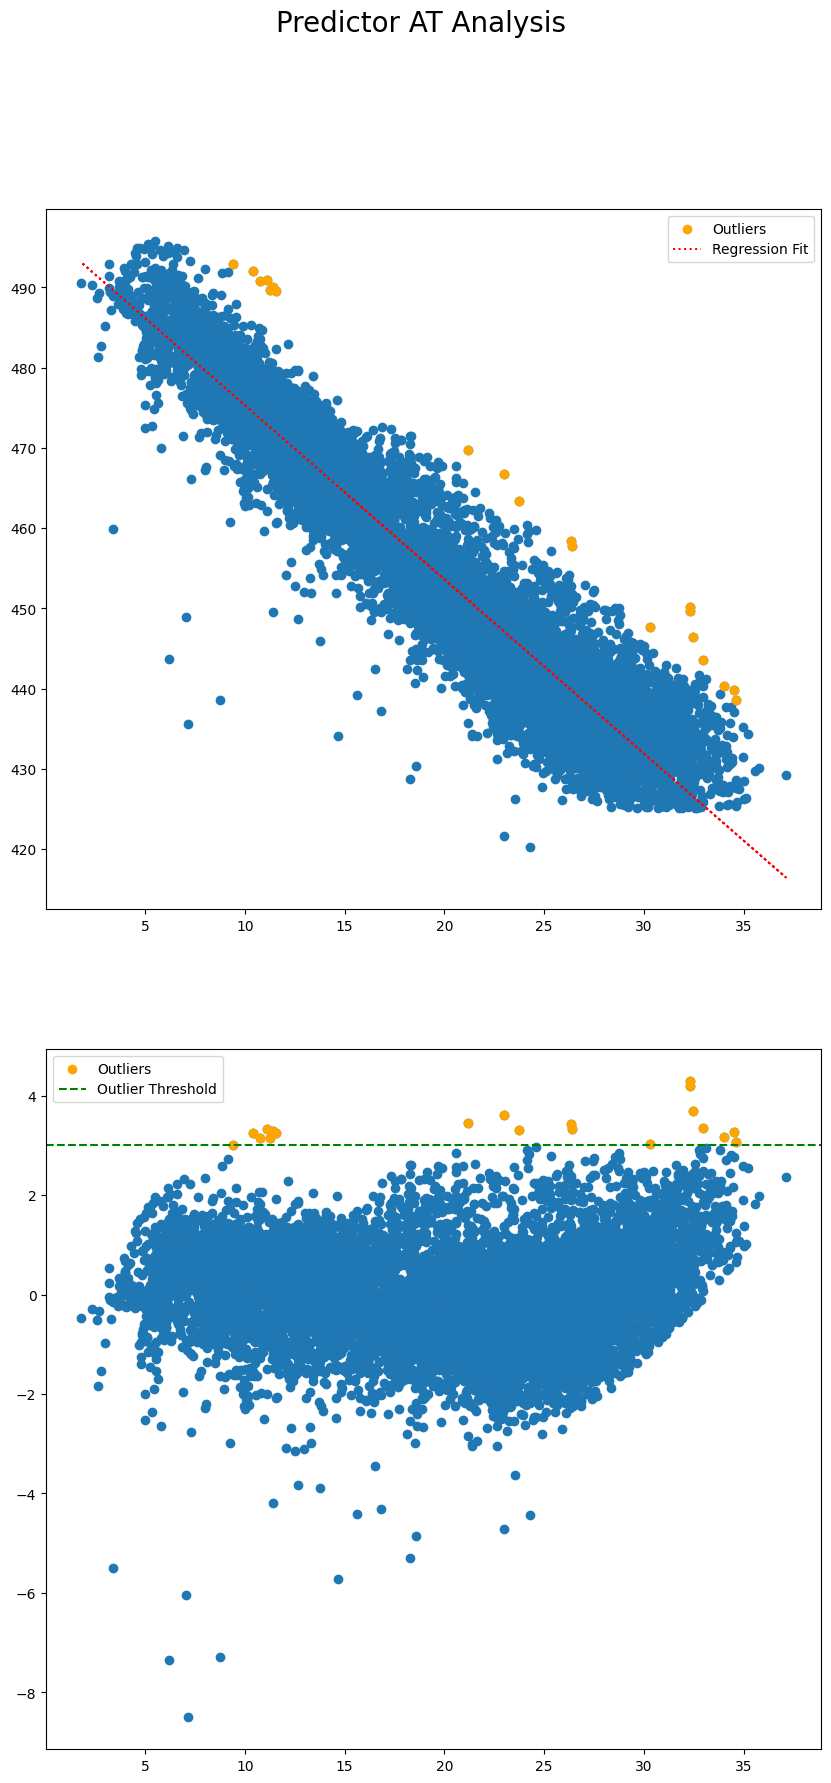

In [323]:
outputAnalysis(results,outliers,y,predictions,x_values,0,'AT')

## (ii) V VS PE

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.756     
Dependent Variable: PE               AIC:                67930.6202
Date:               2023-02-09 13:24 BIC:                67944.9526
No. Observations:   9568             Log-Likelihood:     -33963.   
Df Model:           1                F-statistic:        2.972e+04 
Df Residuals:       9566             Prob (F-statistic): 0.00      
R-squared:          0.757            Scale:              70.929    
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept  517.8015    0.3779  1370.2182  0.0000  517.0608  518.5423
V           -1.1681    0.0068  -172.4015  0.0000   -1.1814   -1.1549
-------------------------------------------------------------------
Omnibus:               77.693       Durbin-Watson:          2

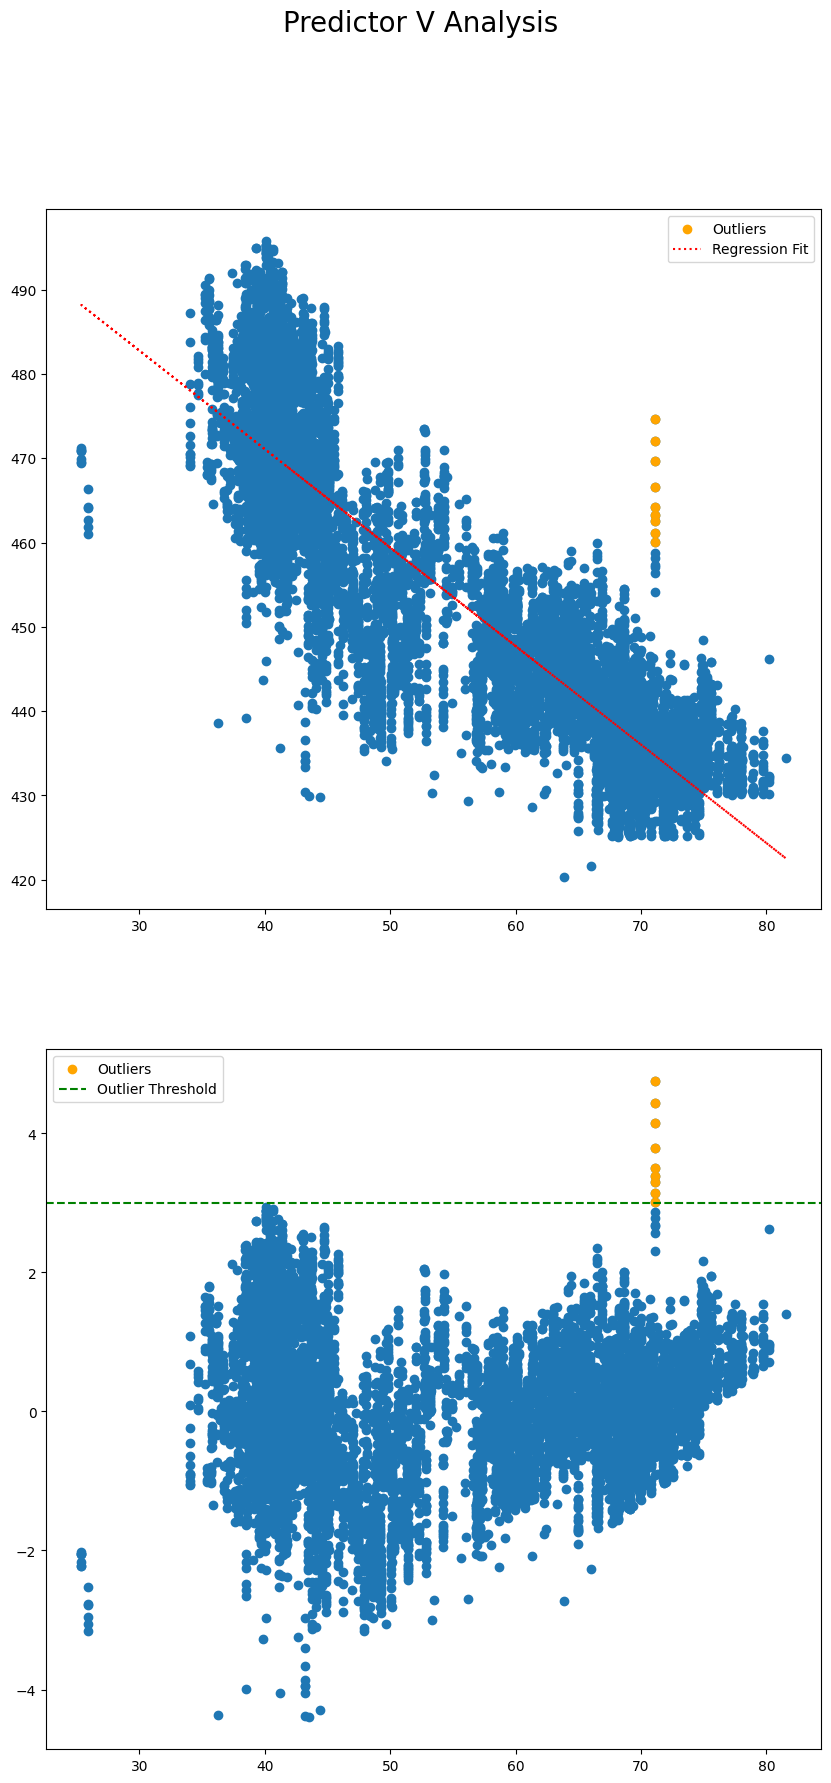

In [324]:
outputAnalysis(results,outliers,y,predictions,x_values,1,'V')

## (iii) AP VS PE

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.269     
Dependent Variable: PE               AIC:                78452.4158
Date:               2023-02-09 13:24 BIC:                78466.7482
No. Observations:   9568             Log-Likelihood:     -39224.   
Df Model:           1                F-statistic:        3516.     
Df Residuals:       9566             Prob (F-statistic): 0.00      
R-squared:          0.269            Scale:              213.02    
-------------------------------------------------------------------
            Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept -1055.2610  25.4595 -41.4486 0.0000 -1105.1670 -1005.3550
AP            1.4899   0.0251  59.2962 0.0000     1.4406     1.5391
-------------------------------------------------------------------
Omnibus:              525.438       Durbin-Watson:          1.996 

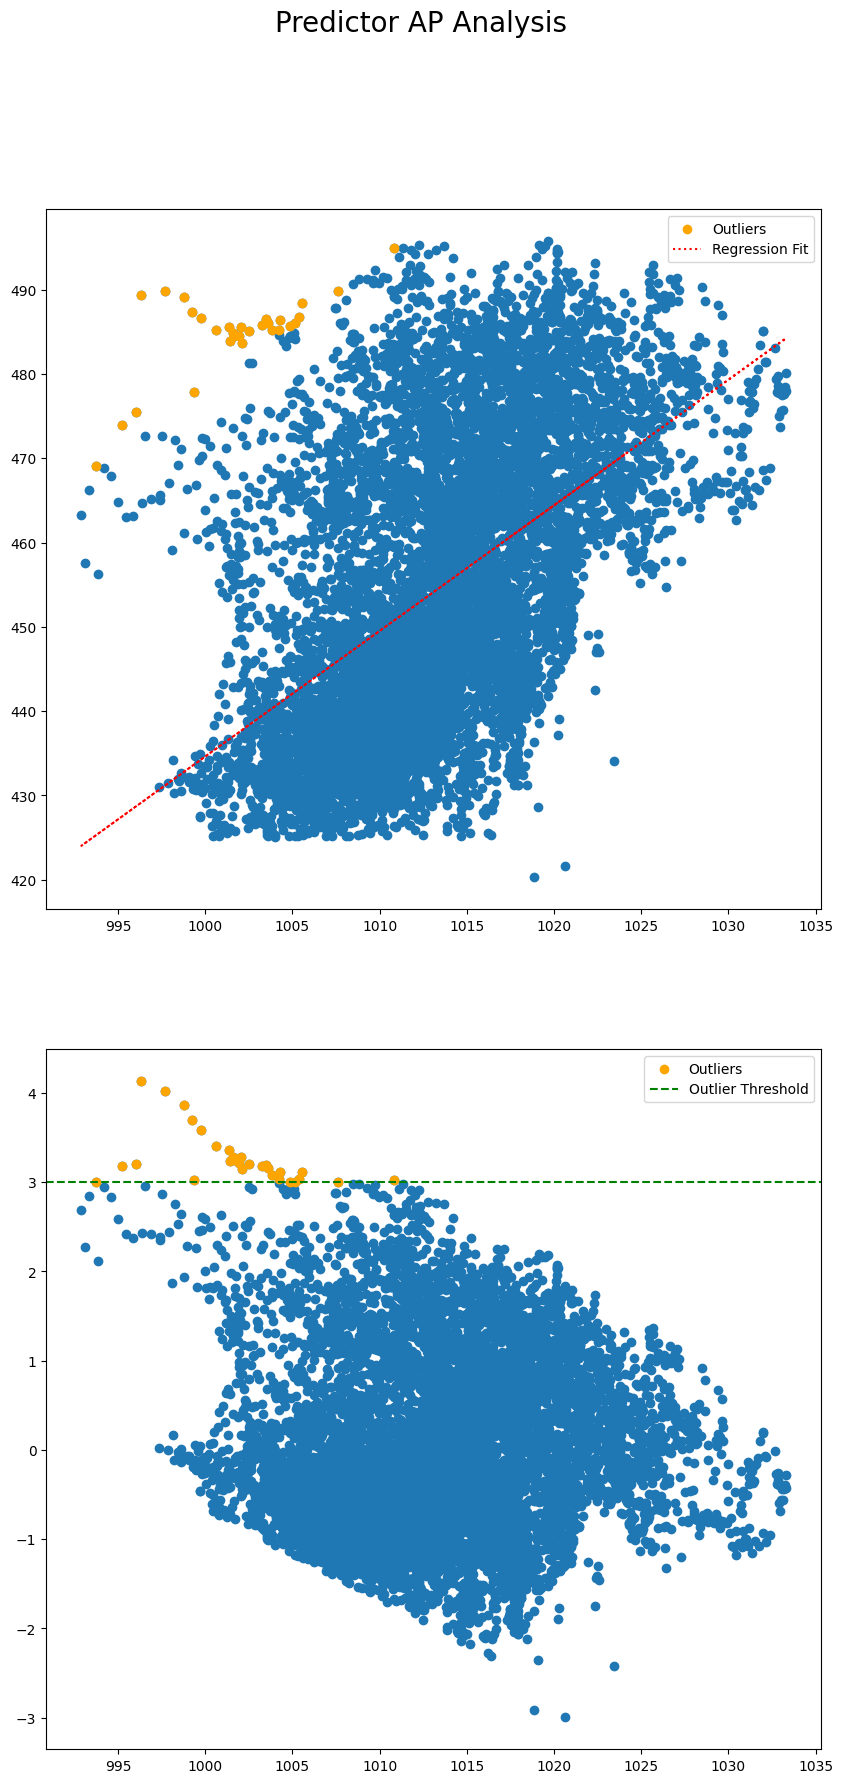

In [325]:
outputAnalysis(results,outliers,y,predictions,x_values,2,'AP')

## (iv) RH VS PE

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.152     
Dependent Variable: PE               AIC:                79870.6055
Date:               2023-02-09 13:24 BIC:                79884.9378
No. Observations:   9568             Log-Likelihood:     -39933.   
Df Model:           1                F-statistic:        1714.     
Df Residuals:       9566             Prob (F-statistic): 0.00      
R-squared:          0.152            Scale:              247.05    
--------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept   420.9618    0.8227  511.6762  0.0000  419.3491  422.5745
RH            0.4557    0.0110   41.3987  0.0000    0.4341    0.4772
-------------------------------------------------------------------
Omnibus:              772.278       Durbin-Watson:          1

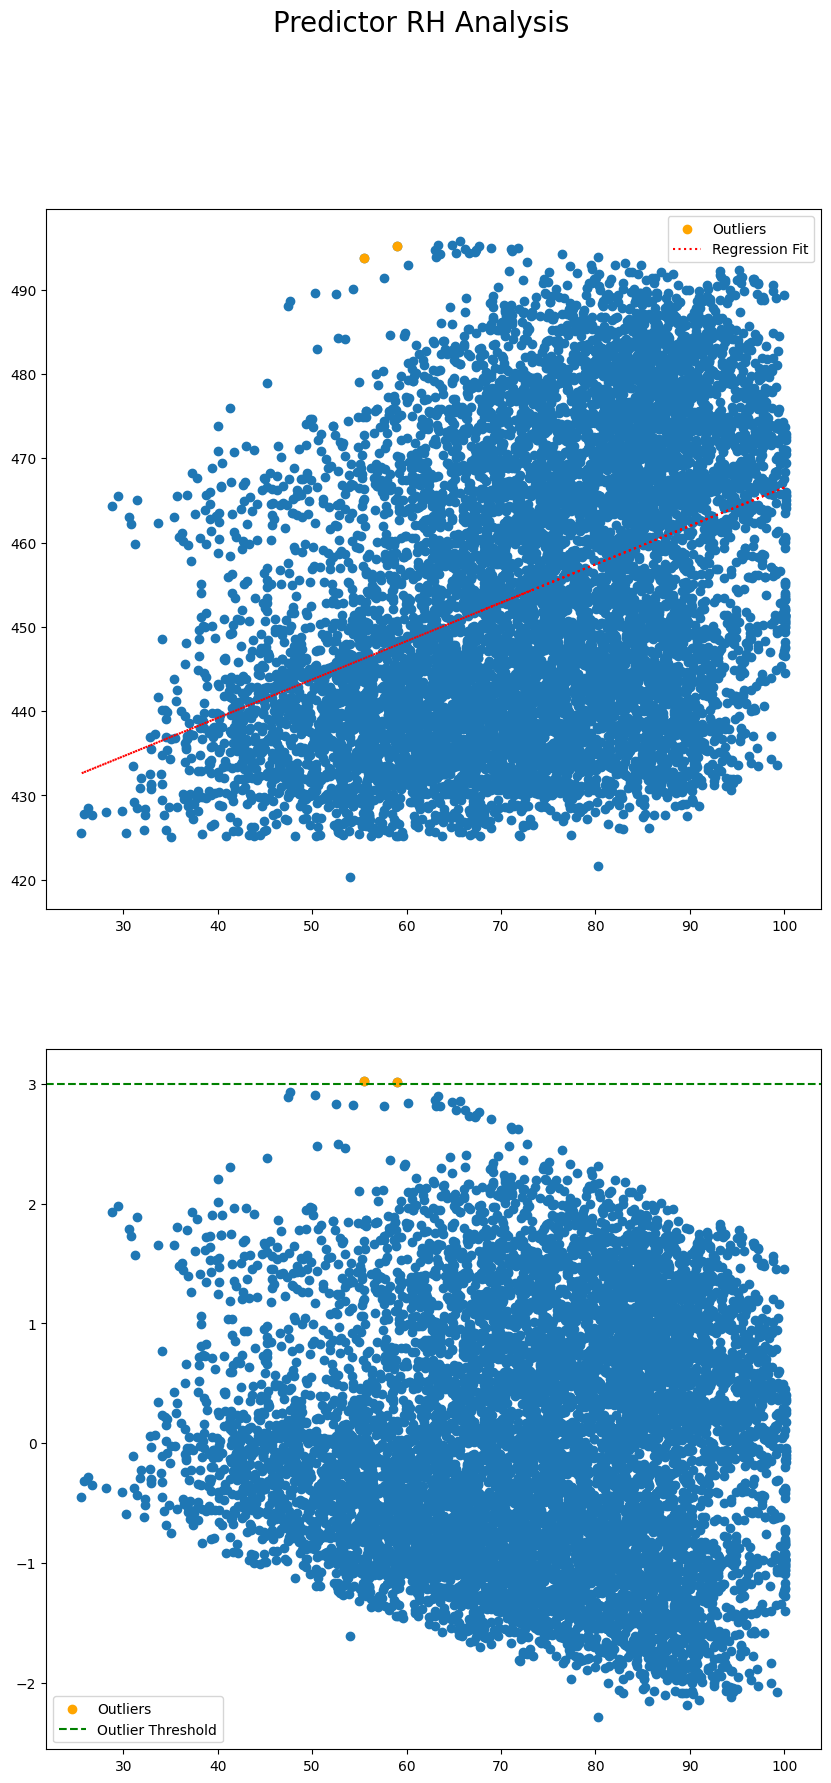

In [326]:
outputAnalysis(results,outliers,y,predictions,x_values,3,'RH')

**Interpretation**

Based on the p-values of the models we can say that all the predictors have a statistically significant association with the response.

Additionally, from the Studentized testing plots we can see that each predictor has some outliers in it with a studentized value > 3.

### (d) Multiple Regression

In [327]:
formula_multi = 'PE ~ AT + V + AP + RH'
result_multi = runOLSFormula(formula_multi, df)
print(result_multi.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.929     
Dependent Variable: PE               AIC:                56186.2290
Date:               2023-02-09 13:24 BIC:                56222.0599
No. Observations:   9568             Log-Likelihood:     -28088.   
Df Model:           4                F-statistic:        3.114e+04 
Df Residuals:       9563             Prob (F-statistic): 0.00      
R-squared:          0.929            Scale:              20.778    
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept  454.6093    9.7485    46.6337  0.0000  435.5001  473.7184
AT          -1.9775    0.0153  -129.3420  0.0000   -2.0075   -1.9475
V           -0.2339    0.0073   -32.1221  0.0000   -0.2482   -0.2196
AP           0.0621    0.0095     6.5641  0.0000    0.0435  

Simiply looking at the coefficient values we see that none of the coefficients are 0 thus we can reject the null hypothesis for all of them. Additionally, with the critical value being +/- 1.962 with 95% confidence interval, using t-statistic scores for each predictor we see that for all predictors we can reject the null hypothesis that the coefficients is 0. 

### (e) 1c Compare to 1d

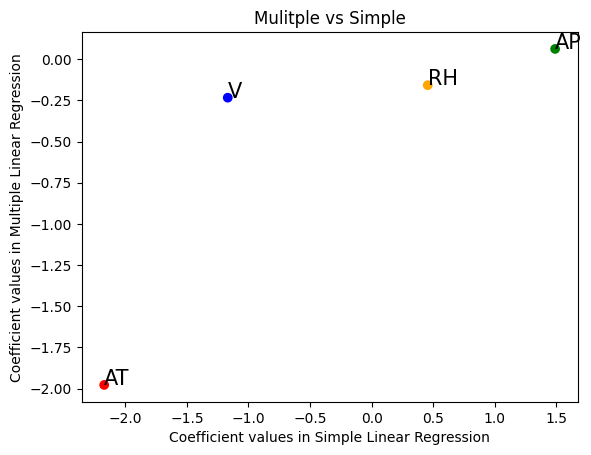

In [328]:
X_coeff = [results[0].params[1], results[1].params[1], results[2].params[1], results[3].params[1]]
y_coeff = result_multi.params[1:]
color = ['red','blue','green','orange']
label = ['AT','V','AP','RH']
plt.scatter(X_coeff, y_coeff, c = color)
plt.title('Mulitple vs Simple')
plt.xlabel('Coefficient values in Simple Linear Regression')
plt.ylabel('Coefficient values in Multiple Linear Regression')
for index in range(len(y_coeff)):
    plt.text(X_coeff[index], y_coeff[index], label[index], fontsize = 15)
plt.show()

### (f) Nonlinear Association

In [329]:
poly = PolynomialFeatures(3)
x_values_poly = ['PE ~ AT + np.power(AT,2) + np.power(AT,3)', 'PE ~ V + np.power(V,2) + np.power(V,3)', 'PE ~ AP + np.power(AP,2) + np.power(AP,3)', 'PE ~ RH + np.power(RH,2) + np.power(RH,3)']
results_poly = []
for x in x_values_poly:
    results_poly.append(runOLSFormula(x,df))

Feature AT

In [330]:
print(results_poly[0].summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.912     
Dependent Variable: PE               AIC:                58209.9482
Date:               2023-02-09 13:24 BIC:                58238.6129
No. Observations:   9568             Log-Likelihood:     -29101.   
Df Model:           3                F-statistic:        3.299e+04 
Df Residuals:       9564             Prob (F-statistic): 0.00      
R-squared:          0.912            Scale:              25.675    
-------------------------------------------------------------------
                 Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept       492.7281   0.6729 732.2476 0.0000 491.4091 494.0472
AT               -0.6103   0.1235  -4.9411 0.0000  -0.8525  -0.3682
np.power(AT, 2)  -0.1251   0.0069 -18.1989 0.0000  -0.1386  -0.1117
np.power(AT, 3)   0.0027   0.0001  22.5942 0.0000   0.0024   0.002

Based on the presented p-values, all below 0.05, we can state that all non-linear values of AT are significant and so have a association with the response.

Feature V

In [331]:
print(results_poly[1].summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.775     
Dependent Variable: PE               AIC:                67178.3543
Date:               2023-02-09 13:24 BIC:                67207.0190
No. Observations:   9568             Log-Likelihood:     -33585.   
Df Model:           3                F-statistic:        1.098e+04 
Df Residuals:       9564             Prob (F-statistic): 0.00      
R-squared:          0.775            Scale:              65.553    
-------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept        554.1468   9.1508 60.5574 0.0000 536.2094 572.0843
V                 -2.1444   0.5088 -4.2145 0.0000  -3.1418  -1.1470
np.power(V, 2)    -0.0027   0.0092 -0.2943 0.7685  -0.0208   0.0154
np.power(V, 3)     0.0001   0.0001  2.4646 0.0137   0.0000   0.000

Based on the presented p-values, we can state that only the cubic non-linear value has assoication, the quadratic non-linear value has too high of a p-value to have significance.

Feature AP

In [332]:
print(results_poly[2].summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.275     
Dependent Variable: PE               AIC:                78374.3345
Date:               2023-02-09 13:24 BIC:                78395.8330
No. Observations:   9568             Log-Likelihood:     -39184.   
Df Model:           2                F-statistic:        1813.     
Df Residuals:       9565             Prob (F-statistic): 0.00      
R-squared:          0.275            Scale:              211.26    
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept            0.0747   0.0089  8.4147 0.0000  0.0573  0.0921
AP                  25.2556   3.0014  8.4147 0.0000 19.3723 31.1389
np.power(AP, 2)     -0.0500   0.0059 -8.4390 0.0000 -0.0616 -0.0383
np.power(AP, 3)      0.0000   0.0000  8.6127 0.0000  0.0000  0.000

Based on the presented p-values, all below 0.05, we can state that all non-linear values of AP are significant and so have a association with the response.

Feature RH

In [333]:
print(results_poly[3].summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.153     
Dependent Variable: PE               AIC:                79854.2409
Date:               2023-02-09 13:24 BIC:                79882.9056
No. Observations:   9568             Log-Likelihood:     -39923.   
Df Model:           3                F-statistic:        579.2     
Df Residuals:       9564             Prob (F-statistic): 0.00      
R-squared:          0.154            Scale:              246.58    
-------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept        468.4135  10.5447 44.4216 0.0000 447.7436 489.0834
RH                -1.7292   0.4862 -3.5568 0.0004  -2.6822  -0.7762
np.power(RH, 2)    0.0321   0.0073  4.4330 0.0000   0.0179   0.0464
np.power(RH, 3)   -0.0002   0.0000 -4.3399 0.0000  -0.0002  -0.000

Based on the presented p-values, all below 0.05, we can state that all non-linear values of RH are significant and so have a association with the response.

### (g) Interactions of Predictors

In [334]:
formula = 'PE ~ AT + V + AP + RH + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH'
result_inter = runOLSFormula(formula, df)
print(result_inter.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.936     
Dependent Variable: PE               AIC:                55118.4140
Date:               2023-02-09 13:24 BIC:                55197.2420
No. Observations:   9568             Log-Likelihood:     -27548.   
Df Model:           10               F-statistic:        1.405e+04 
Df Residuals:       9557             Prob (F-statistic): 0.00      
R-squared:          0.936            Scale:              18.572    
--------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept    685.7825   78.6401   8.7205  0.0000  531.6313  839.9337
AT            -4.3470    2.3731  -1.8318  0.0670   -8.9989    0.3048
V             -7.6749    1.3508  -5.6819  0.0000  -10.3226   -5.0271
AP            -0.1524    0.0768  -1.9833  0.0474   -0.3029  

Based on the shown p-values, if we keep a threshold of 0.05, we can state that AT, AT:AP, V:RH are insignificant and have no association to the response. The following interactions and features were close to being insignificant: AP, RH, AP:RH

### (h) Improvement

Running Linear Regression for All Predictors

In [335]:
# For all preditors 
# Getting data
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:4], y, test_size= 0.3,train_size= 0.7)
df_X_Train = pd.concat([X_train,y_train], axis=1)
# Running model
result = runOLSFormula('PE ~ AT + V + AP + RH', df_X_Train)
pred_y_test = result.predict(sm.add_constant(X_test))
pred_y_train = result.predict(sm.add_constant(X_train))
print(result.summary2())
print()
mse_train = mse(y_train, pred_y_train)
mse_test = mse(y_test, pred_y_test)
print("Train MSE: ",mse_train)
print("Test MSE: ", mse_test)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.930     
Dependent Variable: PE               AIC:                39228.9040
Date:               2023-02-09 13:24 BIC:                39262.9510
No. Observations:   6697             Log-Likelihood:     -19609.   
Df Model:           4                F-statistic:        2.212e+04 
Df Residuals:       6692             Prob (F-statistic): 0.00      
R-squared:          0.930            Scale:              20.472    
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept  453.8036   11.5041    39.4473  0.0000  431.2520  476.3552
AT          -1.9745    0.0181  -109.2805  0.0000   -2.0099   -1.9391
V           -0.2327    0.0087   -26.8854  0.0000   -0.2497   -0.2158
AP           0.0630    0.0112     5.6437  0.0000    0.0411  

Running Linear Regression for All Possible Interaction terms, Non-Linear terms and Predictors

In [336]:
formula_all = 'PE ~ AT + V + AP + RH + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH + np.power(AT, 2) + np.power(V, 2) + np.power(AP, 2) + np.power(RH, 2)'
result_all = runOLSFormula(formula_all, df_X_Train)
print(result_all.summary2())
pred_y_all_test = result_all.predict(sm.add_constant(X_test))
pred_y_all_train = result_all.predict(sm.add_constant(X_train))
print()
mse_train_all = mse(y_train, pred_y_all_train)
mse_test_all = mse(y_test, pred_y_all_test)
print("Train MSE: ", mse_train_all)
print("Test MSE: ", mse_test_all)

                     Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.939     
Dependent Variable:    PE                 AIC:                  38288.5716
Date:                  2023-02-09 13:24   BIC:                  38390.7128
No. Observations:      6697               Log-Likelihood:       -19129.   
Df Model:              14                 F-statistic:          7358.     
Df Residuals:          6682               Prob (F-statistic):   0.00      
R-squared:             0.939              Scale:                17.764    
--------------------------------------------------------------------------
                  Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
--------------------------------------------------------------------------
Intercept       -7257.7669 1407.0547 -5.1581 0.0000 -10016.0431 -4499.4907
AT                 -3.7074    3.5997 -1.0299 0.3031    -10.7640     3.3492
V                  -4.7305    1.7631 -2.6831 0.

Backward Selection Process

In [337]:
def backwardSelection(formula, df):
    max_p = 0.06
    while max_p >= 0.05:
        result = runOLSFormula(formula, df)
        splited_formula = re.split('\~', formula)
        predictors = splited_formula[1].split('+')
        p_vals = result.pvalues[1:]
        max_p = max(p_vals)
        if(max_p > 0.05):
            new_features = []
            idx = np.where(p_vals == max_p)[0]
            for i in range(len(predictors)):
                if(i not in idx):
                    new_features.append(predictors[i])
            formula = splited_formula[0] + '~' + '+'.join(new_features)
        else:
            return result, formula

In [338]:
result_back, final_formula = backwardSelection(formula_all ,df_X_Train)
print("Final Formula: ", final_formula)
print()
print(result_back.summary2())
pred_back_train = result_back.predict(sm.add_constant(X_train))
pred_back_test = result_back.predict(sm.add_constant(X_test))
print()
mse_train_back = mse(y_train, pred_back_train)
mse_test_back = mse(y_test, pred_back_test)
print("Train MSE: ",mse_train_back)
print("Test MSE: ", mse_test_back)

Final Formula:  PE ~ AT + V + AP + RH + AT:V + AT:RH + V:AP + AP:RH + np.power(AT, 2) + np.power(AP, 2) + np.power(RH, 2)

                      Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.939     
Dependent Variable:     PE                 AIC:                  38285.7192
Date:                   2023-02-09 13:24   BIC:                  38367.4322
No. Observations:       6697               Log-Likelihood:       -19131.   
Df Model:               11                 F-statistic:          9364.     
Df Residuals:           6685               Prob (F-statistic):   0.00      
R-squared:              0.939              Scale:                17.764    
---------------------------------------------------------------------------
                  Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
---------------------------------------------------------------------------
Intercept       -7659.8741 1233.2162  -6.2113 0.0000 -10077.371

Based on the MSE of the above results we can see a drastic improvement from having only all the predictors (AT, V, AP, RH) to including non-linear terms, interactions and then doign backward selection.

### (i) KNN

In [339]:
def knn_model(k_values, train_x, train_y, test_x, test_y):
    k_data = {}
    for n in k_values:
        model = KNeighborsRegressor(n_neighbors = n)
        model.fit(train_x, train_y)

        # Get the predictions
        pred_train = np.array(model.predict(train_x))
        pred_test = np.array(model.predict(test_x))

        # Cal error
        train_err = mse(train_y, pred_train)
        test_err = mse(test_y, pred_test)
        
        k_data[1/n]= [test_err,train_err,pred_test,pred_train]
    k_df = pd.DataFrame(k_data).T
    k_df.columns = ['test_error', 'train_error', 'test_prediction', 'train_prediction']
    return k_df

Running Raw Features and Normalized Features using KNN

In [340]:
minmax = MinMaxScaler()
normal_X_train = minmax.fit_transform(X_train)
normal_X_test = minmax.fit_transform(X_test)
knn_norm_result = knn_model([i for i in range(1, 101, 1)], normal_X_train, y_train, normal_X_test, y_test)
knn_raw_result = knn_model([i for i in range(1, 101, 1)], X_train, y_train, X_test, y_test)

Showing Graph for KNN

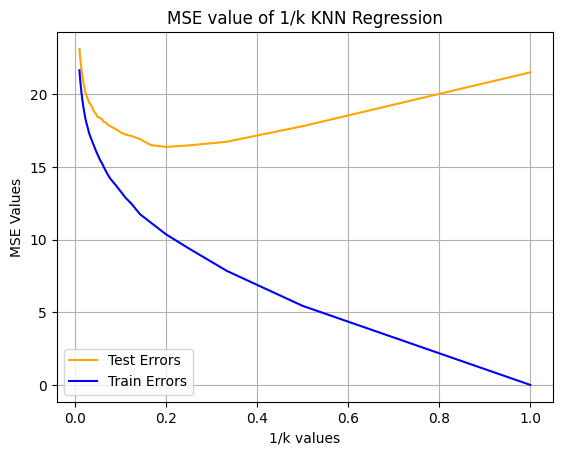


Minimum Train MSE: 0.0 when k is: 1.0
Minimum Test MSE: 16.38782569139673 when k is: 5.0


In [341]:
plt.plot(knn_raw_result.index, knn_raw_result['test_error'], color='orange', label='Test Errors')
plt.plot(knn_raw_result.index, knn_raw_result['train_error'], color='blue', label='Train Errors')
plt.title("MSE value of 1/k KNN Regression")
plt.xlabel("1/k values")
plt.ylabel("MSE Values")
plt.grid(True)
plt.legend(loc='best')
plt.show()
print()
print("Minimum Train MSE: {} when k is: {}".format(min(knn_raw_result['train_error']), 1/knn_raw_result.index[np.where(knn_raw_result['train_error'] == min(knn_raw_result['train_error']))[0][0]]))
print("Minimum Test MSE: {} when k is: {}".format(min(knn_raw_result['test_error']), 1/knn_raw_result.index[np.where(knn_raw_result['test_error'] == min(knn_raw_result['test_error']))[0][0]]))

### (j ) Compare KNN and Linear

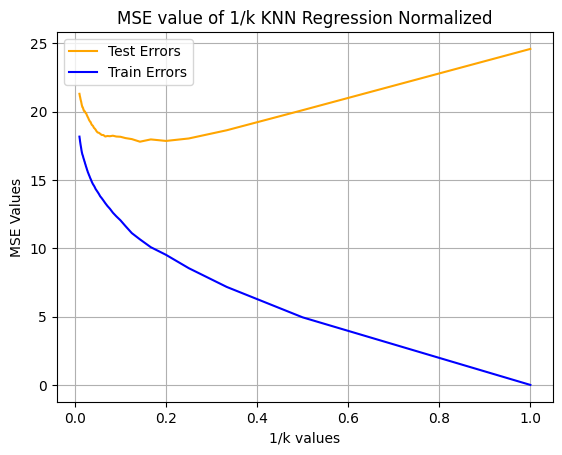


Minimum Train MSE: 0.0 when k is: 1.0
Minimum Test MSE: 17.79168689001202 when k is: 7.0


In [342]:
plt.plot(knn_norm_result.index, knn_norm_result['test_error'], color='orange', label='Test Errors')
plt.plot(knn_norm_result.index, knn_norm_result['train_error'], color='blue', label='Train Errors')
plt.title("MSE value of 1/k KNN Regression Normalized")
plt.xlabel("1/k values")
plt.ylabel("MSE Values")
plt.grid(True)
plt.legend(loc='best')
plt.show()
print()
print("Minimum Train MSE: {} when k is: {}".format(min(knn_norm_result['train_error']), 1/knn_norm_result.index[np.where(knn_norm_result['train_error'] == min(knn_norm_result['train_error']))[0][0]]))
print("Minimum Test MSE: {} when k is: {}".format(min(knn_norm_result['test_error']), 1/knn_norm_result.index[np.where(knn_norm_result['test_error'] == min(knn_norm_result['test_error']))[0][0]]))

In [343]:
comparison = pd.DataFrame(
    data=[[mse_test, mse_test_all, mse_test_back, min(knn_raw_result['test_error']), min(knn_norm_result['test_error'])],[mse_train, mse_train_all, mse_train_back, min(knn_raw_result['train_error']), min(knn_norm_result['train_error'])]],
    columns=['Only Predictors', 'Predictors + Interactions + Quadratic', 'Backward Selection', 'KNN Raw Results', 'KNN Normalized Results'],
    index=['Test Errors', 'Train Errors'])
comparison

,Only Predictors,Predictors + Interactions + Quadratic,Backward Selection,KNN Raw Results,KNN Normalized Results
Test Errors,21.513592,19.026739,19.021033,16.387826,17.791687
Train Errors,20.456749,17.723926,17.732258,0.000000,0.000000


Based on the results shown we can conclude that KNN seems to have the better test errors.

## 2. ISLR: 2.4.1

### Q1) For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

### (a) The sample size n is extremely large, and the number of predictors p is small.

When the sample size is large and the number of predictors is small we expect there to be more datapoints and therefore it is easier for a model to overfit the data. Based on this, a flexible method does better than an inflexible one as it can help avoid overfitting of the data.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

When the sample size is small and the number of predictors is large an inflexible method will do better. This is because the small number of sample woudl cause the flexible method to overfit the data.

### (c) The relationship between the predictors and response is highly non-linear.

It would be better to use a flexible method. This is because the flexible method would inlucde more terms in general than the inflexible method assuring us that the non-linear terms are possibly included in the model.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

A inflexible method would do better there because the flexible method would fit the noise and cause more errors.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

Obs | X | X' | X'' | Y
- - - - - - - - - - - - 
1   | 0 | 3  | 0   | RED

2   | 2 | 0  | 0   | RED

3   | 0 | 1  | 3   | RED

4   | 0 | 1  | 2   | GREEN

5   |-1 | 0  | 1   | GREEN

6   | 1 | 1  | 1   | RED
- - - - - - - - - - - - 

X1 = X2 = X3 = 0

Euclidean distance = Sqrt((X1-X)^2 + (X2-X')^2 + (X2-X'')^2)

1: 3

2: 2

3: SQRT(10) = 3.16

4: SQRT(5) = 2.23

5: SQRT(2) = 1.41

6: SQRT(3) = 1.73

### (b) What is our prediction with K = 1? Why?

Answer: Green

Explanation: If K = 1 and the coordinate given is (0,0,0) then the closest value would be observation 5 which is Green. Therefore our prediction would be green.

### (c) What is our prediction with K = 3? Why?

Answer: Red. 

Exlpanation: If K = 3, with coordinates (0,0,0), the closets neighbours would be Observations 5, 6, 2 which have the values Green, Red, Red. Therefore the probability of prediction being Red is 2/3 and for Green is 1/3. Hence, our prediction would be Red.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

If the Bayes decision boundary is highly non-linear than a smaller value of K would be better it be more flexible than a larger value of K, thus leading to a non-linear model. 

## References

# https://www.statsmodels.org/devel/example_formulas.html
# https://www.science.smith.edu/~jcrouser/SDS293/labs/lab2-py.html